# Climate Risk Perceptions


In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Analyzing Questionnaire Data

In [3]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

raw_questionnaire


,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_2,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,2,0,1,0,3,0,1,2,2
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,7,0,1,0,3,0,2,2,2
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,2,2,0,1,0,3,0,2,2,3
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,1,1,0,1,0,3,0,2,2,2
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,2,0,1,0,3,0,2,3,3
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,2,5,0,1,0,3,0,2,2,2
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,1,0,1,0,3,0,2,3,2


# Climate Risk Perceptions (C2)

In [4]:
perceptions = pd.DataFrame()
perceptions['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'C2' in item:
        perceptions[item] = raw_questionnaire[item].astype(float)

risks = ['Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']


dict2 = {}
for key, value in zip(perceptions.columns[1:], risks):
    dict2[key] = value

perceptions.rename(columns=dict2, inplace=True)
perceptions.replace(98, np.NaN, inplace=True)
perceptions.replace(99, np.NaN, inplace=True)

test = perceptions.iloc[382]
test

HHID           2610091.0
Droughts             NaN
Floods               3.0
Groundwater          3.0
Heat                 3.0
Pests                3.0
Frost                3.0
Hail                 3.0
Name: 382, dtype: float64

In [5]:
#Basic Box Plot of Climate Perceptions
std_perceptions = perceptions
#Standardizing so that "no change" shows up as 0
for col in perceptions.columns[1:]:
    std_perceptions[col] = perceptions[col] - 2




In [6]:
ind_perceptions = std_perceptions[['HHID', 'Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']]

ind_perceptions.to_csv('IndividualHazardPerceptions.csv')

ind_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


[0.594 0.682 0.436 0.49  0.868 0.634 0.244]
[0.162 0.134 0.256 0.226 0.046 0.144 0.352]
[ 0.43286573  0.548       0.18        0.264       0.822       0.49
 -0.108     ]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/354269410.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=30, rotation=45)


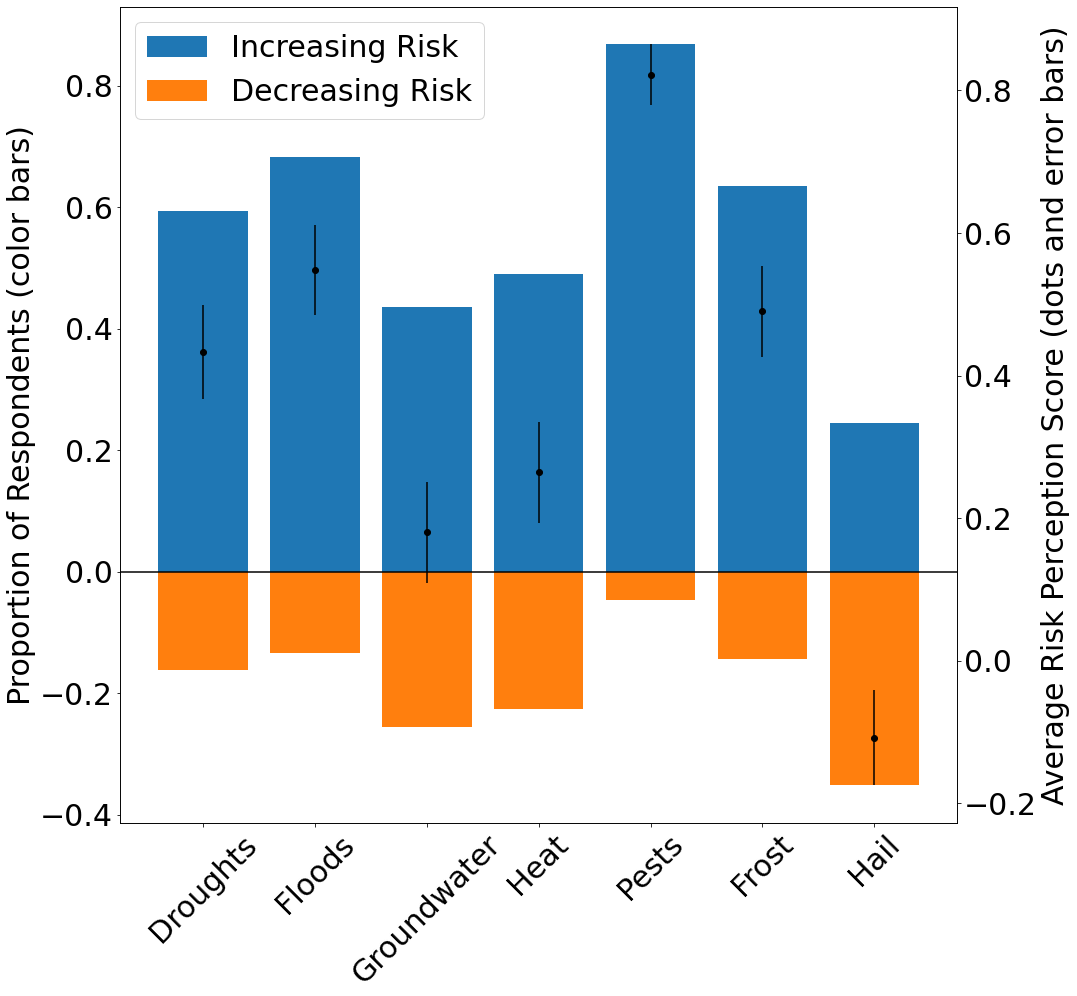

In [7]:
risk_types = len(risks)
respondents = len(std_perceptions)

higher = np.zeros(risk_types)
lower = np.zeros(risk_types)
mean = np.zeros(risk_types)
xpos = np.zeros(risk_types)
error = np.zeros(risk_types)

data = []

f, ax1 = plt.subplots(figsize=(15,15)) 

for i, name in enumerate(std_perceptions.columns[1:]):
    data.append(std_perceptions[name])
    xpos[i] = i
    higher[i] = len(std_perceptions[std_perceptions[name] == 1.0]) / respondents
    lower[i] = len(std_perceptions[std_perceptions[name] == -1.0]) / respondents
    mean[i] = std_perceptions[name].mean()
    error[i] = confint(std_perceptions[name])


print(higher)
print(lower)
print(mean)
ax1.bar(xpos, higher, label = 'Increasing Risk')
ax1.bar(xpos, -lower, label = 'Decreasing Risk')

ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=30, rotation=45)

plt.ylabel('Proportion of Respondents (color bars)', size=30)
plt.yticks(size=30)
plt.axhline(y=0, color='black')
plt.legend(fontsize=30)

ax2 = ax1.twinx()

ax2.scatter(xpos, mean, color='black')
ax2.errorbar(xpos, mean, yerr=error, color='black', fmt='none')
ax2.set_ylabel('Average Risk Perception Score (dots and error bars)', size=30)

plt.yticks(size=30)
plt.xticks(size=30, rotation=45)

plt.show()
#plt.savefig('RiskPerception_singleaxis.png', bbox_inches='tight')

In [8]:
#Creating Total Perceptions Measure
std_perceptions['Total'] = std_perceptions['Droughts'] + std_perceptions['Floods'] + std_perceptions['Groundwater'] + std_perceptions['Heat'] + std_perceptions['Pests'] + std_perceptions['Frost'] + std_perceptions['Hail']

std_perceptions['Total'].describe()
max_value = std_perceptions['Total'].max()
std_perceptions['TotalNorm'] = std_perceptions['Total'] / max_value
std_perceptions

discrete_perceptions = std_perceptions.iloc[:,1:-3]
discrete_perceptions['Min'] = discrete_perceptions.min(axis=1)
discrete_perceptions['Max'] = discrete_perceptions.max(axis=1)

np.count_nonzero((discrete_perceptions['Min'] == -1.0) & (discrete_perceptions['Max'] == 1.0)) / 500



0.552

In [9]:
std_perceptions['Quart'] = 0

for h in range(len(std_perceptions)):
    if std_perceptions['Total'][h] <= 0:
        std_perceptions['Quart'][h] = 1
    elif std_perceptions['Total'][h] <= 2:
        std_perceptions['Quart'][h] = 2
    elif std_perceptions['Total'][h] <= 4:
        std_perceptions['Quart'][h] = 3
    else:
        std_perceptions['Quart'][h] = 4

std_perceptions.to_csv('Std_Perceptions.csv')

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/1597361435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 2
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/1597361435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/1597361435.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [10]:
#Merging with Migration Data

#Import Data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')

raw_data.replace(' ',0, inplace=True)


#This creates a new dataframe to store only the data that we want
migration = pd.DataFrame()
migration['HHID'] = raw_data['HHID']

target_columns = ['C12_', 'C13_']

#This loops over each column name in the raw_cvfs dataframe. If the column name matches one of the variables we want, then we store it in the clean_cvfs dataframe
for item in raw_data.columns:
    
    #For example, here I am saying that any variable that contains 'B11A' should be stored in our dataframe. This includes all the separate 'B11A' variables for each year.
    for col in target_columns:
        if col in item:
        
            migration[item] = raw_data[item].astype(float)

local = []
intl = []
for col in migration.columns:
    if 'C12' in col:
        local.append(col)
    elif 'C13' in col:
        intl.append(col)
        
migration['Local'] = migration[local].sum(axis=1)
migration['Intl'] = migration[intl].sum(axis=1)

for i in range(len(migration)):
    if migration['Local'][i] > 0:
        migration['Local'][i] = 1
    if migration['Intl'][i] > 0:
        migration['Intl'][i] = 1
        
migration

short_migration = migration[['HHID', 'Local', 'Intl']]

short_migration


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_86292/1369044100.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Intl'][i] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_86292/1369044100.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Local'][i] = 1


,HHID,Local,Intl
0,2301006,0.0,0.0
1,2301007,0.0,0.0
2,2301013,0.0,1.0
3,2301016,1.0,0.0
4,2301017,0.0,0.0
...,...,...,...
495,2611114,0.0,1.0
496,2611115,0.0,1.0
497,2611117,0.0,0.0
498,2611118,0.0,0.0


In [11]:
mig_climrisk = pd.merge(std_perceptions, short_migration, on='HHID')

mig_climrisk

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart,Local,Intl
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2,0.0,0.0
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1,0.0,0.0
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1,0.0,1.0
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3,1.0,0.0
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3,0.0,1.0
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4,0.0,1.0
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1,0.0,0.0
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2,0.0,0.0


[1. 2. 3. 4.]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_82180/564127864.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)


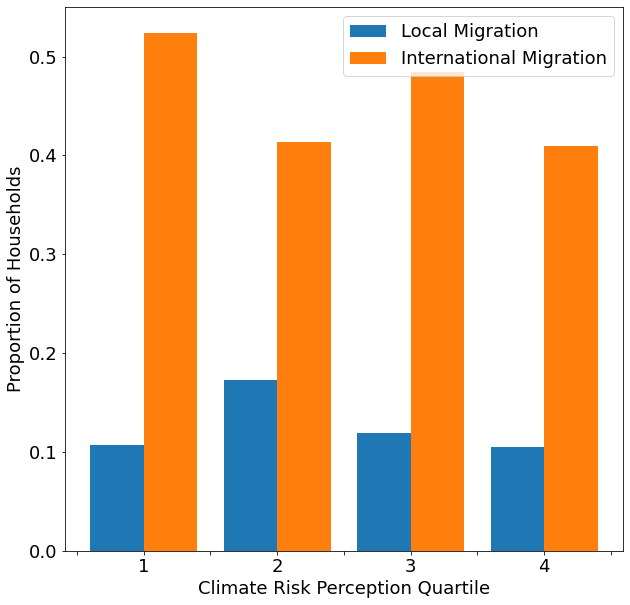

In [13]:
#Bar Plot - Risk Quartile and Migration

quart_local = np.zeros(4)
quart_intl = np.zeros(4)

for i in range(len(quart_local)):
    quart_local[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Local'].mean()
    quart_intl[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Intl'].mean()

x = np.linspace(1,4,4)
print(x)
y1 = quart_local
y2 = quart_intl

f, ax1 = plt.subplots(figsize=[10,10])
ax1.bar(x-0.2, y1, width=0.4, label='Local Migration')
ax1.bar(x+0.2, y2, width=0.4, label='International Migration')

ax1.set_ylabel('Proportion of Households', size=18)
ax1.set_xlabel('Climate Risk Perception Quartile', size=18)
ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)
ax1.set_ylim([0,0.55])
plt.yticks(size=18)
plt.legend(fontsize=18)
plt.show()

#plt.savefig('Migration_RiskQuartile.png', bbox_inches='tight')

# Summary Statistics: Salience of Risks (B4)

In [10]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

salience = pd.DataFrame()
salience['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'B4' in item:
        salience[item] = raw_questionnaire[item].astype(float)

salience

,HHID,B4_1,B4_2,B4_3,B4_4,B4_5,B4_6,B4_7,B4_8,B4_9,B4_10,B4_11,B4_12,B4_13,B4_14,B4_15,B4_97,B4_97_1,B4_97_1_1
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,-1.0,-1.0
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,-1.0
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,-1.0,-1.0
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,-1.0,-1.0
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,0.0,-1.0,-1.0


In [11]:
#Converting column heads to descriptive names

factors = ['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious']

factor_dict = {}
for key, value in zip(salience.columns[1:-3], factors):
    factor_dict[key] = value

    
salience.rename(columns=factor_dict, inplace=True)

clean_salience = salience.iloc[:, :-3]

clean_salience



,HHID,Labour,Health,Technology,Finance,Education,Seeds,Soil,Water,Land,ShortWeather,LongWeather,Pests,Markets,Economy,Religious
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0


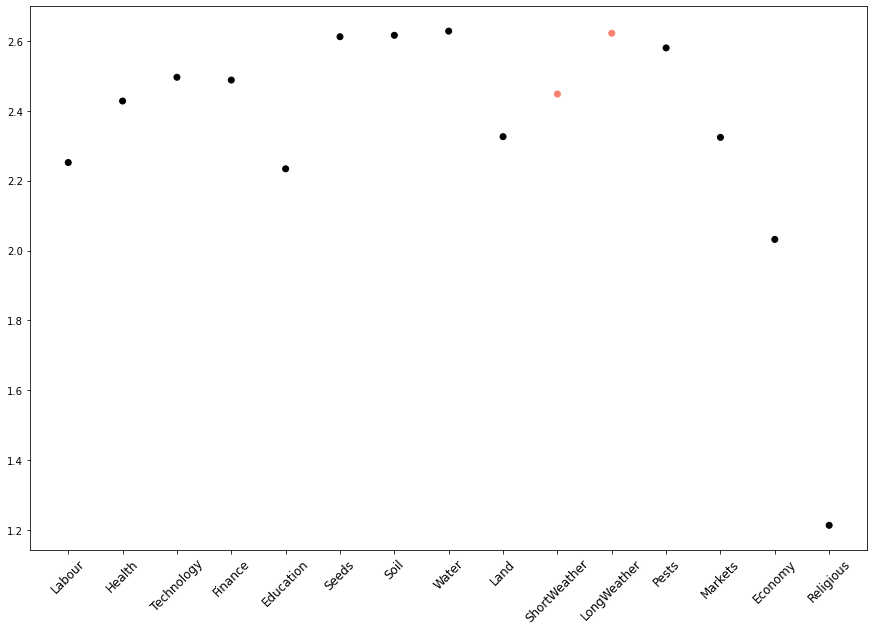

In [12]:
# Confidence Interval Plot

num_factors = len(factors)
means = np.zeros(num_factors)
error = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)
color_label = []
for f, element in enumerate(factors):
    means[f] = clean_salience[element].mean()
    error[f] = confint(clean_salience[element])
    if 'Weather' in element:
        color_label.append('salmon')
    else:
        color_label.append('black')


f, ax = plt.subplots(figsize=[15,10])
ax.scatter(xpos, means, color=color_label)
#ax.errorbar(xpos, means, yerr=error, color=color_label, fmt='none')
ax.set_xticks(xpos)
ax.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=12, rotation=45)

plt.show()


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/1929756823.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=24)


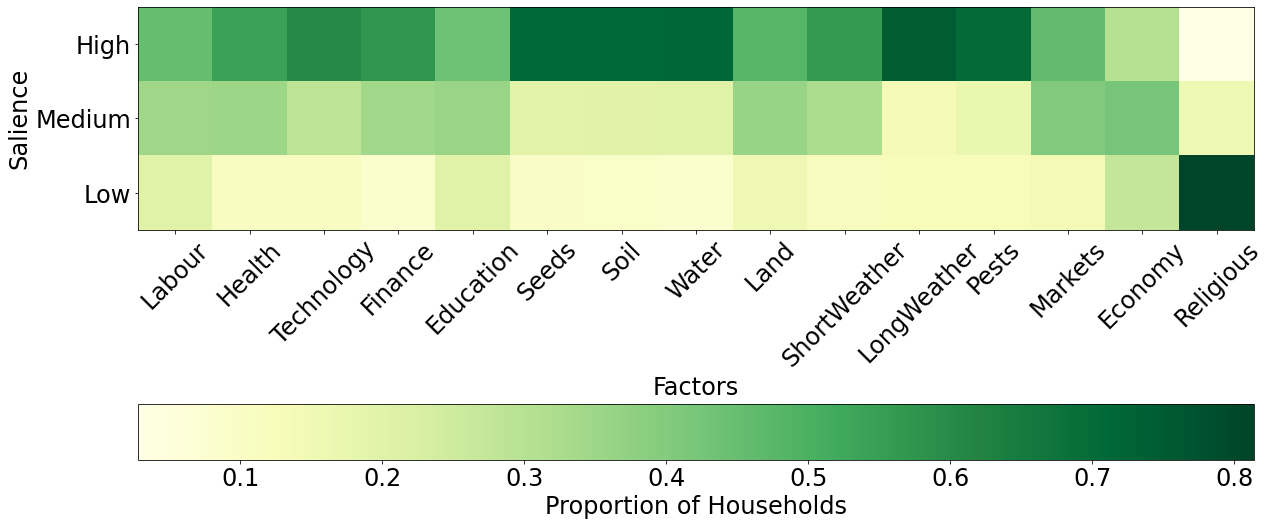

In [13]:
#Heat Map Plot

high = np.zeros(num_factors)
medium = np.zeros(num_factors)
low = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)

for f, element in enumerate(factors):
    total_responses = np.count_nonzero(clean_salience[element] > 0)
    high[f] = np.count_nonzero(clean_salience[element] == 3) / total_responses
    medium[f] = np.count_nonzero(clean_salience[element] == 2) / total_responses
    low[f] = np.count_nonzero(clean_salience[element] == 1) / total_responses
    
z = [low, medium, high]
output = np.asarray(z)

f, ax1 = plt.subplots(figsize=[20,16])
ax1.set_xticks(xpos)
ax1.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=24, rotation=45)
ax1.set_xlabel('Factors', fontsize=24)

ax1.set_ylabel('Salience', fontsize=24)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=24)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
cbar = f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')
cbar.ax.tick_params(labelsize=24)
cbar.set_label(label='Proportion of Households', fontsize=24)

plt.show()

#plt.savefig('Salience.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_50830/1264315584.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=24)


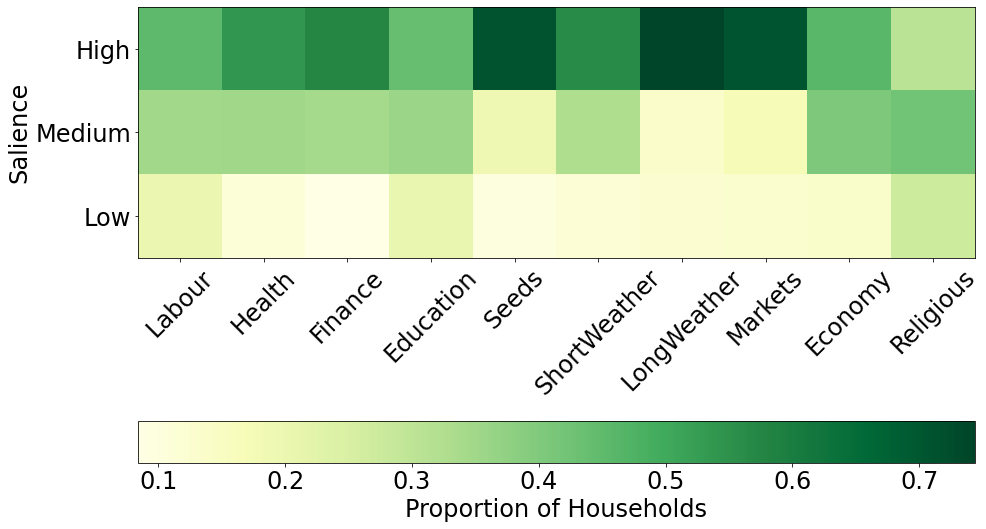

In [14]:
#Shortened Version

key_factors = [0,1,3,4,5,9,10,11,12,13]

short_high = np.zeros(len(key_factors))
short_med = np.zeros(len(key_factors))
short_low = np.zeros(len(key_factors))
i = 0
for f, element in enumerate(factors):
    if f in key_factors:
        short_high[i]= np.count_nonzero(clean_salience[element] == 3) / total_responses
        short_med[i] = np.count_nonzero(clean_salience[element] == 2) / total_responses
        short_low[i] = np.count_nonzero(clean_salience[element] == 1) / total_responses
        i += 1


z = [short_low, short_med, short_high]
output = np.asarray(z)
x_short = np.arange(0, len(key_factors), 1)
f, ax1 = plt.subplots(figsize=[15,15])
ax1.set_xticks(x_short)
ax1.set_xticklabels(['Labour', 'Health', 'Finance', 'Education', 'Seeds', 'ShortWeather','LongWeather','Markets','Economy','Religious'], size=24, rotation=45)
#ax1.set_xlabel('Factors', fontsize=24)

ax1.set_ylabel('Salience', fontsize=24)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=24)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
cbar = f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')
cbar.ax.tick_params(labelsize=24)
cbar.set_label(label='Proportion of Households', fontsize=24)

plt.show()

#plt.savefig('Short_Salience.png', bbox_inches='tight')

In [15]:
#Constructing Salience Index

background_salience = clean_salience.loc[ : , clean_salience.columns != 'LongWeather']

background_salience['Mean'] = background_salience.loc[: , background_salience.columns != 'HHID'].mean(axis=1)
clean_salience['Mean'] = background_salience['Mean']
clean_salience['Net_Salience'] = clean_salience['LongWeather'] - clean_salience['Mean']
clean_salience['Net_Salience'].describe()

clean_salience['Translate_Salience'] = clean_salience['Net_Salience'] + 2
max_value = clean_salience['Translate_Salience'].max()
clean_salience['SalienceIndex'] = clean_salience['Translate_Salience'] / max_value

clean_salience['LongWeather'].describe()

count    500.000000
mean       2.622000
std        0.692875
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: LongWeather, dtype: float64

In [16]:
clean_salience

,HHID,Labour,Health,Technology,Finance,Education,Seeds,Soil,Water,Land,ShortWeather,LongWeather,Pests,Markets,Economy,Religious,Mean,Net_Salience,Translate_Salience,SalienceIndex
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.500000,0.500000,2.500000,0.673077
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.285714,-0.285714,1.714286,0.461538
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.714286,0.285714,2.285714,0.615385
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.285714,1.714286,3.714286,1.000000
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,2.428571,0.571429,2.571429,0.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.714286,0.285714,2.285714,0.615385
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.571429,0.428571,2.428571,0.653846
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.214286,-0.214286,1.785714,0.480769
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.642857,0.357143,2.357143,0.634615


In [17]:
std_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,2.0,0.285714,2
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,-1.0,-0.142857,1
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.142857,2
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.428571,3
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.142857,2
...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,3.0,0.428571,3
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,5.0,0.714286,4
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-2.0,-0.285714,1
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.142857,2


In [18]:
#Creating dataframe with both perceptions and salience indicators
salience_merge = clean_salience.iloc[:,:-4]
salience_merge.rename(columns={"Pests":"PestSalience"}, inplace=True)
perceptions_merge = std_perceptions.iloc[:,:-3]

complete_perceptions = pd.merge(salience_merge,perceptions_merge, on='HHID')
complete_perceptions.to_csv('DisaggregatedRiskPerceptions.csv')

complete_perceptions


,HHID,Labour,Health,Technology,Finance,Education,Seeds,Soil,Water,Land,...,Markets,Economy,Religious,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,...,3.0,2.0,1.0,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,3.0,3.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,...,2.0,1.0,1.0,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,2.0,2.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


In [20]:
#Constructing composite risk perceptions index

clean_salience[['Risk_Norm', 'Quart']] = std_perceptions[['TotalNorm', 'Quart']]
clean_salience['CompositeRisk'] = clean_salience['SalienceIndex'] * clean_salience['Risk_Norm']
final_salience = clean_salience[['HHID', 'SalienceIndex', 'Risk_Norm', 'CompositeRisk']]
final_salience.to_csv('ClimateRiskPerceptions.csv')

final_salience


,HHID,SalienceIndex,Risk_Norm,CompositeRisk
0,2301006,0.673077,0.285714,0.192308
1,2301007,0.461538,-0.142857,-0.065934
2,2301013,0.615385,0.142857,0.087912
3,2301016,1.000000,0.428571,0.428571
4,2301017,0.692308,0.142857,0.098901
...,...,...,...,...
495,2611114,0.615385,0.428571,0.263736
496,2611115,0.653846,0.714286,0.467033
497,2611117,0.480769,-0.285714,-0.137363
498,2611118,0.634615,0.142857,0.090659


# Principal Components Analysis

In [134]:
#Standardizing Source Likert Ratings
for item in sourcenames:
    narrow_sources[item] = (narrow_sources[item] - narrow_sources[item].mean()) / np.std(narrow_sources[item])

sources_pca = pd.merge(narrow_sources, clean_salience, on='HHID')
sources_pca.dropna(inplace=True)
X = sources_pca.iloc[:, 1:13].values
y = sources_pca.iloc[:, -1].values

sources_pca




,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,...,Pests,Markets,Economy,Religious_y,Mean,Net_Salience,Translate_Salience,SalienceIndex,Risk_Norm,CompositeRisk
0,2301006,2.387152,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-0.308532,...,3.0,3.0,2.0,1.0,2.500000,0.500000,2.500000,0.673077,0.166667,0.112179
2,2301013,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,2.0,2.0,1.0,1.0,1.714286,0.285714,2.285714,0.615385,0.000000,0.000000
3,2301016,-0.669381,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,3.0,1.0,1.0,1.0,1.285714,1.714286,3.714286,1.000000,0.500000,0.500000
4,2301017,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,3.0,3.0,1.0,2.428571,0.571429,2.571429,0.692308,0.333333,0.230769
5,2301021,2.387152,1.481573,3.527670,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,0.443986,...,3.0,3.0,2.0,1.0,1.928571,1.071429,3.071429,0.826923,0.166667,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.623019,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,1.196504,...,3.0,3.0,3.0,2.0,2.714286,0.285714,2.285714,0.615385,0.666667,0.410256
496,2611115,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,1.241890,-1.061051,...,3.0,3.0,3.0,1.0,2.571429,0.428571,2.428571,0.653846,1.000000,0.653846
497,2611117,-0.669381,-0.025622,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-1.217249,0.443986,...,2.0,2.0,1.0,1.0,2.214286,-0.214286,1.785714,0.480769,-0.166667,-0.080128
498,2611118,-0.669381,-0.779220,-0.351733,-0.475769,3.124112,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,2.0,2.0,1.0,2.642857,0.357143,2.357143,0.634615,0.333333,0.211538


In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
  
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.24834111, 0.10690079])

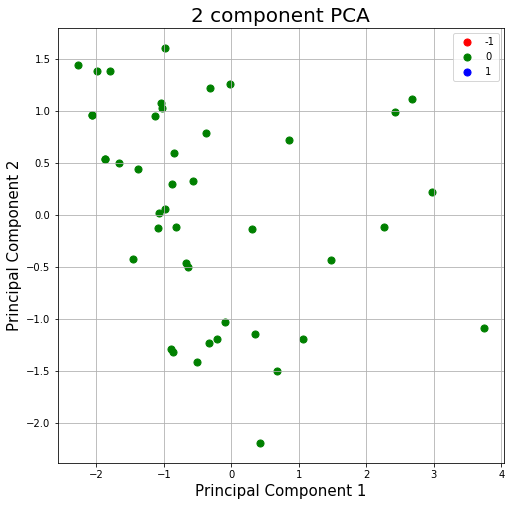

In [136]:
final_sourceDf = pd.concat([principalDf, sources_pca[['CompositeRisk']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_sourceDf['CompositeRisk'] == target
    ax.scatter(final_sourceDf.loc[indicesToKeep, 'principal component 1']
               , final_sourceDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

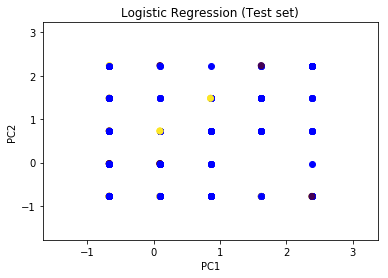

In [138]:

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X, y
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             #X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             #cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
#plt.legend()
  
# show scatter plot
plt.show()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: GroupIndex, dtype: float64

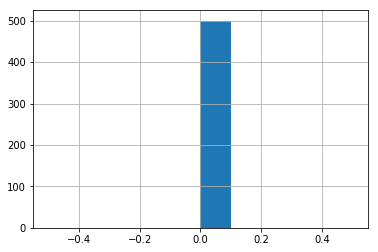

In [50]:
narrow_groups['GroupNumber'].hist()

plt.show()

# Regression Models

# Predicting Climate Risk Perceptions


In [158]:
#Creating dataframe
predict_df = pd.DataFrame()

group_df = dummy_groups
source_df = narrow_sources
hazards_df = narrow_exposure
hh_df = hh_info
risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

merge1 = pd.merge(group_df, source_df, on='HHID')
merge2 = pd.merge(merge1, hazards_df, on='HHID')
merge3 = pd.merge(merge2, hh_info, on='HHID')
predict_df = pd.merge(merge3, risk_df, on='HHID')

cleanpredict_df = predict_df.dropna()

In [159]:
cleanpredict_df

,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,GroupNumber,GroupIndex,...,Frost,Hail,Heat,HazardNumber,HazardIndex,H1,H2,Risk_Norm,SalienceIndex,CompositeRisk
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0.6,...,0.0,0.0,0.0,2,-0.831499,1,500000,0.166667,0.673077,0.112179
2,2301013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.2,...,0.0,0.0,0.0,1,-1.673097,1,270000,0.000000,0.615385,0.000000
3,2301016,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0.6,...,0.0,0.0,0.0,3,0.010099,1,400000,0.500000,1.000000,0.500000
4,2301017,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,180000,0.333333,0.692308,0.230769
5,2301021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,150000,0.166667,0.826923,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,3,0.010099,1,170000,0.666667,0.615385,0.410256
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,2,-0.831499,1,300000,1.000000,0.653846,0.653846
497,2611117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,...,0.0,0.0,0.0,2,-0.831499,0,150000,-0.166667,0.480769,-0.080128
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,7.0,0.0,0.0,4,0.851697,0,20000,0.333333,0.634615,0.211538


In [161]:
y = cleanpredict_df['CompositeRisk']

x_1 = cleanpredict_df[['SourceIndex', 'GroupIndex', 'HazardIndex', 'H1','H2']]
             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.054
Date:                Tue, 04 Oct 2022   Prob (F-statistic):             0.0700
Time:                        18:06:07   Log-Likelihood:                -22.256
No. Observations:                 498   AIC:                             56.51
Df Residuals:                     492   BIC:                             81.77
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1702      0.051      3.335      0.001       0.070       0.270
SourceIndex    -0.0140      0.012     -1.181      0.238      -0.037       0.009
GroupIndex      0.0147      0.057      0.259      0.795      -0.097       0.126
HazardIndex     0.0298      0.012      2.585      0.010       0.007       0.053
H1              0.0862      0.052      1.655      0.099      -0.016       0.189
H2          -1.239e-08   4.06e-08     -0.305      0.760   -9.21e-08    6.73e-08
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.561
Skew:                          -0.395   Prob(JB):                     0.000689
Kurtosis:                       3.279   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""